### JDF - boundary condition analysis and transports

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import warnings
warnings.filterwarnings('ignore') 

In [14]:
import netCDF4 as nc
import matplotlib
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

import mpl_interactions.ipyplot as iplt
from mpl_interactions import indexer
%matplotlib ipympl

## Visualize where transports are output in the model

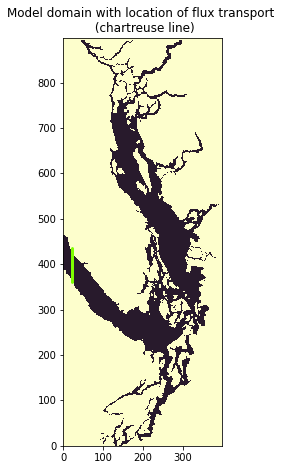

In [5]:
fact = 0.5
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
# for i in range(370,480):
#     pts = ax1.scatter(5,i,s=3,c='red', marker='o')
    
for i in range(361,(361+75)):
    pts = ax1.scatter(23,i,s=3,c='chartreuse', marker='o')
    
w = plt.title('Model domain with location of flux transport \n (chartreuse line)')

In [6]:
anomsal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/anomsal_flux_stor_conc.pkl', 'rb'))  
anomDIC_2050_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/anomDIC_2050_flux_stor.pkl', 'rb'))  

tcmap = cm.cm.phase
colsamplr = np.zeros([12,4])

for i in range(0,12):
    colsamplr[i,:]  = tcmap(i/12)
# print(color)
# print(np.shape(color))

testcol = np.zeros([480,4])
for i in range(0,480):
    
    testcol[i,:] = colsamplr[i%12,:]

In [7]:
# def sal(year):
#     ts = anomsal_flux_stor_conc[year-2013,:,:]
#     #print(np.shape(ts))
#     ts2 = np.reshape(ts,(40*12))
#     #print(np.shape(ts2))
#     return ts2

# # w = (sal(2013))
# def DIC(sal,year):
#     tdic = anomDIC_2050_flux_stor_conc[year-2013,:,:]
#     tdic2 = np.reshape(tdic,(40*12))
#     return tdic2



![legend](legend.png)

NameError: name 'sal' is not defined

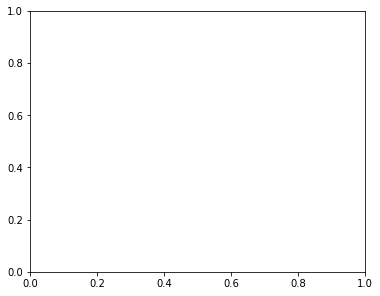

In [12]:



# fig, ax = plt.subplots(figsize=(6, 4.8))
# controls = iplt.scatter(
#     sal,
#     DIC,
    
#     s=10,
#     year=np.arange(2013, 2020),
#     c=testcol,
#     #edgecolors="k",
#     slider_formats="{:d}",
#     play_buttons=True,
#     play_button_pos="left",
# )

# # for m in range(0,12):
# #     iplt.scatter(indexer(datX[:, 0, m]), indexer(datY[:, 0, m]),\
# #                  color = 'k', label=f'month: {m+1}', controls=ctrls)

    
# fs = 15
# plt.grid()
# #ax.set_xscale("log")
# ax.axhline(y=0); ax.axvline(x=0) 
# ax.set_xlim([-20000, 20000])
# ax.set_ylim([-1500,1500])
# ax.set_xlabel("Salinity anomaly (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
# _ = ax.set_ylabel("DIC anomaly (mol m$^{-2}$ d$^{-1}$)", fontsize=12)

In [15]:
datY = anomDIC_2050_flux_stor_conc
datX = anomsal_flux_stor_conc

fig, ax = plt.subplots(figsize=(6, 4.8))

# plot the first month in order to generate the controls
ctrls = iplt.plot(
    indexer(datX[:, :, 0], "year"),
    indexer(datY[:, :, 0], "year"),
    "o",
    color = colsamplr[0,:],
    label=f"mon: {1}",
    year=np.arange(7),
)
for m in range(1, 12):
    iplt.plot(
        indexer(datX[:, :, m], "year"),
        indexer(datY[:, :, m], "year"),
        "o",
        color = colsamplr[m,:],
        label=f"mon: {m+1}",
        controls=ctrls,
        #controls=ctrls["year"]
    )
plt.grid()
plt.xlim([-25000,25000])
plt.ylim([-1500,1500])
plt.legend(loc=4, fontsize = 8, ncol = 2)
ax.set_xlabel("Salinity anomaly (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
_ = ax.set_ylabel("DIC anomaly (mol m$^{-2}$ d$^{-1}$)", fontsize=12)
plt.title('SEASONALITY OF JDF FLUXES BY YEAR: YEAR 0 = 2013')

#anim = ctrls.save_animation("JDF_seasonality.gif", fig, "year", interval=35)

#anim = ctrls.save_animation("JDF_seasonality.gif", fig, "year")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'SEASONALITY OF JDF FLUXES BY YEAR: YEAR 0 = 2013')

In [10]:
# fact = 0.3
# fig, axs = plt.subplots(2,4, figsize=(11, 9), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.21)

# axs = axs.ravel()
# months = [5,6,7,8,11,12,1,2]
# for i in range(8):

#     #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
#     axs[i].plot(anomsal_flux_stor_conc[0,:,months[i]-1],\
#                  anomDIC_2050_flux_stor_conc[0,:,months[i]-1])
#     axs[i].set_title(f'month {months[i]}')
#     axs[i].set_xlim([-25000,25000])
#     axs[i].set_ylim([-1500,1500])
    
# # plt.tight_layout()

In [11]:
# np.shape(anomDIC_2050_flux_stor_conc)